In [1]:
# Importamos las librerias para el analisis exploratorio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# Cargamos los datasets

train = pd.read_csv("/content/drive/MyDrive/CaixaBank-Hackaton/train.csv")
test = pd.read_csv("/content/drive/MyDrive/CaixaBank-Hackaton/test_x.csv")

In [3]:
# Mostramos los 5 primeros registros del dataset de entrenamiento

train.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
2,1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
3,1994-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1


In [4]:
# Vemos informacion estadistica al detalle de los datos de entrenamiento

train.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Target
count,6554,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6.421000e+03,6554.000000
unique,6554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1994-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8936.540448,9005.235576,8858.340567,8934.978558,8934.970624,8.218074e+07,0.516936
std,NaN,2732.102441,2749.009324,2712.511028,2731.032625,2731.030170,1.231845e+08,0.499751
min,NaN,2865.100098,2877.300049,2833.600098,2865.100098,2865.097168,0.000000e+00,0.000000
25%,NaN,7732.399902,7817.200195,7641.500000,7727.799805,7727.791992,0.000000e+00,0.000000
50%,NaN,9329.700195,9404.599609,9243.000000,9331.000000,9331.000000,1.966000e+05,1.000000
75%,NaN,10525.500000,10590.299805,10441.200195,10523.400391,10523.400391,1.773980e+08,1.000000


In [5]:
# Tenemos datos nulos y hay que buscar un metodo de tratar esos datos

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6554 non-null   object 
 1   Open       6421 non-null   float64
 2   High       6421 non-null   float64
 3   Low        6421 non-null   float64
 4   Close      6421 non-null   float64
 5   Adj Close  6421 non-null   float64
 6   Volume     6421 non-null   float64
 7   Target     6554 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 409.8+ KB


In [6]:
# Convierto la columna Date a formato fecha
train['Date'] = pd.to_datetime(train['Date'])

In [7]:
# Relleno los datos faltantes mediante una interpolacion lineal

train_fixed = train.copy(deep=True)
columns_to_interpolated = ['Open','High','Low','Close','Adj Close','Volume']
train_fixed[columns_to_interpolated] = train_fixed[columns_to_interpolated].interpolate(method='linear', axis=0)
train_fixed.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
2,1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
3,1994-01-06,3623.199951,3634.799926,3591.049926,3628.799926,3628.796264,0.0,0
4,1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1


In [8]:
# Ahora no tenemos datos NaN en el dataset

train_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6554 non-null   datetime64[ns]
 1   Open       6554 non-null   float64       
 2   High       6554 non-null   float64       
 3   Low        6554 non-null   float64       
 4   Close      6554 non-null   float64       
 5   Adj Close  6554 non-null   float64       
 6   Volume     6554 non-null   float64       
 7   Target     6554 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 409.8 KB


Text(0.5, 1.0, 'Matriz de correlacion')

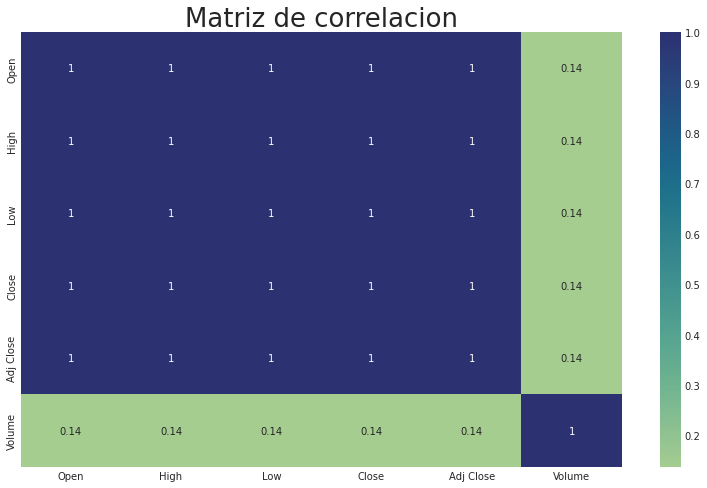

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(train_fixed.drop(columns=['Target']).corr(), annot=True, cmap='crest')
plt.title('Matriz de correlacion', fontsize=26)

<Figure size 144x144 with 0 Axes>

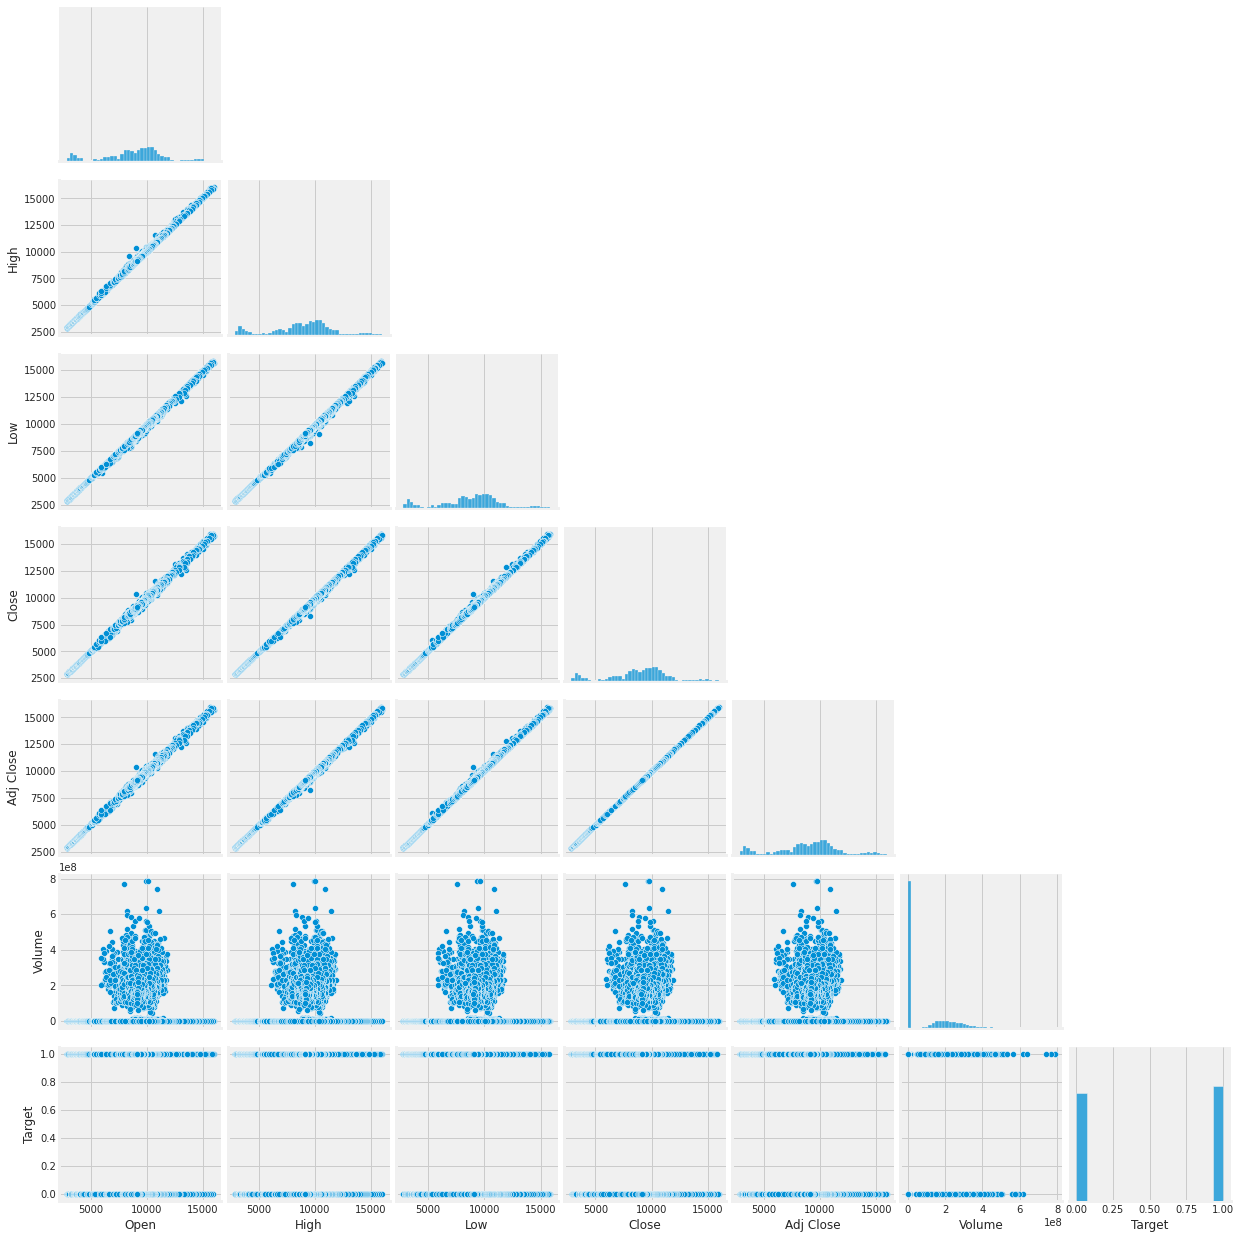

In [40]:
plt.figure(figsize=(2,2))
sns.pairplot(train_fixed, corner=True)
plt.show()

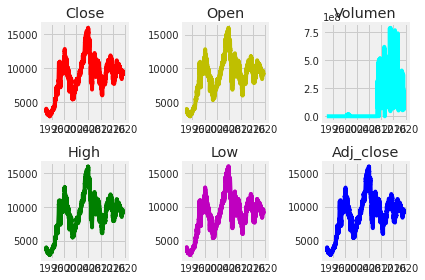

In [48]:
date = train_fixed['Date']
close = train_fixed['Close']
Open = train_fixed['Open']
High = train_fixed['High']
Low  = train_fixed['Close']
Adj_close  = train_fixed['Adj Close']
Volumen = train_fixed['Volume']
fig , ((axes1,axes2,axes3),(axes4,axes5,axes6))= plt.subplots(2,3)
axes1.plot(date,close,'r')
axes1.set_title('Close')
axes2.plot(date,Open,'y')
axes2.set_title('Open')
axes3.plot(date,Volumen,'cyan')
axes3.set_title('Volumen')
axes4.plot(date,High,'g')
axes4.set_title('High')
axes5.plot(date,Low,'m')
axes5.plot(date,Low,'m')
axes5.set_title('Low')
axes6.plot(date,Adj_close,'b')
axes6.set_title('Adj_close')
fig.tight_layout()
plt.show()

De esta matriz de correlacion notamos que la variable volumen está pobremente correlacionada o directamente no hay relación.<br>
**Ya que las otras variables están directamente relacionadas nos brindan la misma informacion y podemos usar solo una para hacer nuestras predicciones, en este caso tomaré la variable 'Close' para hacer las predicciones.**

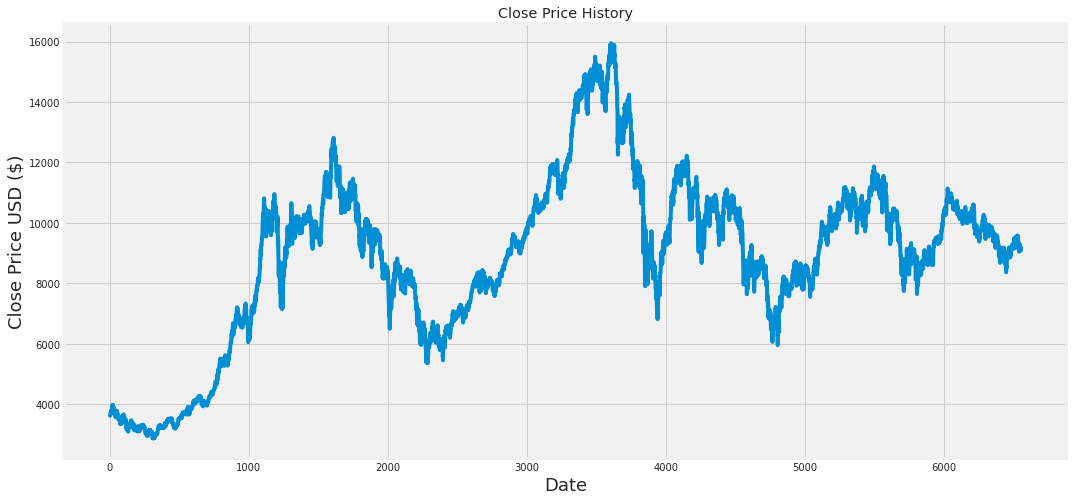

In [10]:
# Vista historica del precio de cierre

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(train_fixed['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.8.0


In [12]:
X, y = train_fixed.Close.values.reshape(-1, 1), train_fixed.Target.values.reshape(-1, 1)


# Escalamos nuestros datos en el rango de 0 a 1

escaler = MinMaxScaler()

X = escaler.fit_transform(X)

In [13]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [14]:
X_valid = X_test[:(X_test.size//2)]
X_test = X_test[(X_test.size//2):]
y_valid = y_test[:(y_test.size//2)]
y_test = y_test[(y_test.size//2):]

In [15]:
print(f'x_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'X_valid.shape = {X_valid.shape}')
print(f'y_valid.shape = {y_valid.shape}')
print(f'x_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

x_train.shape = (4915, 1)
y_train.shape = (4915, 1)
X_valid.shape = (819, 1)
y_valid.shape = (819, 1)
x_test.shape = (820, 1)
y_test.shape = (820, 1)


In [16]:
from tensorflow.keras import regularizers

In [17]:
model_basic = keras.Sequential([
              keras.layers.LSTM(
                  units=32,
                  activation='tanh',
                  return_sequences=True,
                  recurrent_activation='sigmoid',
                  use_bias=True, dropout=0.2,
                  kernel_regularizer = regularizers.l2(1e-5),
                  input_shape=(X_train.shape[1], 1)),
              keras.layers.Dense(64, activation='relu'),
              keras.layers.LSTM(units=128, activation='tanh', return_sequences=False, recurrent_activation='sigmoid', use_bias=True, dropout=0.2, kernel_regularizer = regularizers.l2(1e-5)),
              keras.layers.Dense(32, activation='relu'),
              keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model_basic.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             4352      
                                                                 
 dense (Dense)               (None, 1, 64)             2112      
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 109,441
Trainable params: 109,441
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_basic.compile(
    metrics=['accuracy'],
    optimizer='adam',
    loss='binary_crossentropy'
)

In [20]:
history = model_basic.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
154/154 [==============================] - 12s 23ms/step - loss: 0.6935 - accuracy: 0.5009 - val_loss: 0.6917 - val_accuracy: 0.5409
Epoch 2/20
154/154 [==============================] - 2s 13ms/step - loss: 0.6930 - accuracy: 0.5123 - val_loss: 0.6917 - val_accuracy: 0.5409
Epoch 3/20
154/154 [==============================] - 2s 12ms/step - loss: 0.6930 - accuracy: 0.5123 - val_loss: 0.6911 - val_accuracy: 0.5409
Epoch 4/20
154/154 [==============================] - 2s 11ms/step - loss: 0.6929 - accuracy: 0.5123 - val_loss: 0.6911 - val_accuracy: 0.5409
Epoch 5/20
154/154 [==============================] - 2s 12ms/step - loss: 0.6930 - accuracy: 0.5123 - val_loss: 0.6911 - val_accuracy: 0.5409
Epoch 6/20
154/154 [==============================] - 2s 10ms/step - loss: 0.6929 - accuracy: 0.5123 - val_loss: 0.6914 - val_accuracy: 0.5409
Epoch 7/20
154/154 [==============================] - 2s 11ms/step - loss: 0.6929 - accuracy: 0.5123 - val_loss: 0.6916 - val_accuracy: 0.540

In [21]:
results = model_basic.evaluate(X_test, y_test)

26/26 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5207


In [22]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


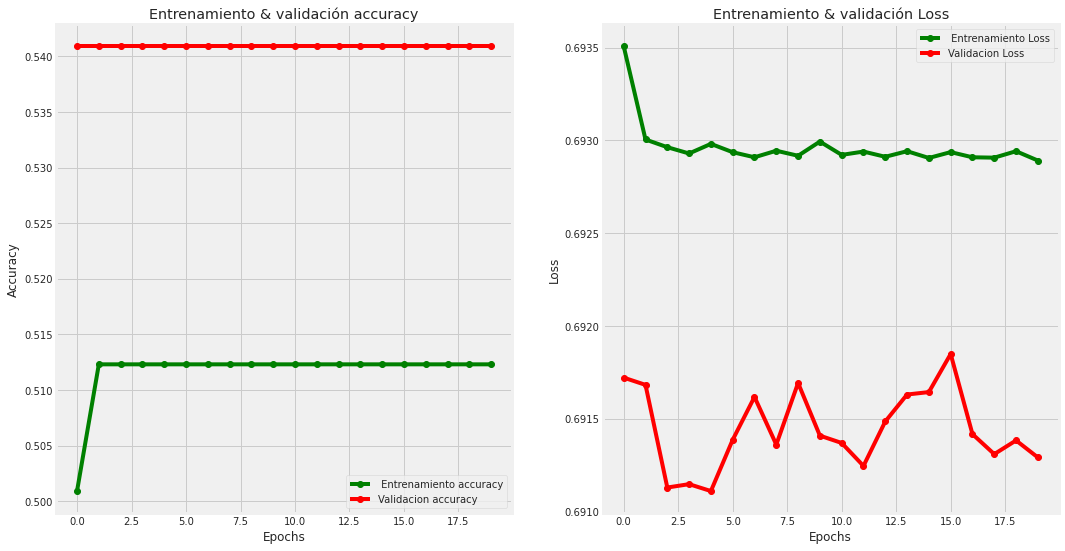

In [24]:
visualizacion_resultados(history)

In [25]:
model_optimizer = keras.Sequential([
              keras.layers.LSTM(
                  units=64,
                  activation='tanh',
                  return_sequences=True,
                  recurrent_activation='sigmoid',
                  use_bias=True, dropout=0.2,
                  kernel_regularizer = regularizers.l2(1e-5),
                  input_shape=(X_train.shape[1], 1)),
              keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              keras.layers.LSTM(units=128, activation='tanh', return_sequences=False, recurrent_activation='sigmoid', use_bias=True, dropout=0.2, kernel_regularizer = regularizers.l2(1e-5)),
              keras.layers.Dense(64, activation='relu'),
              keras.layers.Dense(16, activation='relu'),
              keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model_optimizer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_3 (Dense)             (None, 1, 64)             4160      
                                                                 
 dense_4 (Dense)             (None, 1, 256)            16640     
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 1)                

In [27]:
model_optimizer.compile(
    metrics=['accuracy'],
    optimizer='adam',
    loss='binary_crossentropy'
)

In [28]:
history_optimizer = model_optimizer.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
154/154 [==============================] - 5s 13ms/step - loss: 0.6945 - accuracy: 0.5084 - val_loss: 0.6918 - val_accuracy: 0.5409
Epoch 2/20
154/154 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5123 - val_loss: 0.6914 - val_accuracy: 0.5409
Epoch 3/20
154/154 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.5123 - val_loss: 0.6916 - val_accuracy: 0.5409
Epoch 4/20
154/154 [==============================] - 1s 7ms/step - loss: 0.6929 - accuracy: 0.5123 - val_loss: 0.6917 - val_accuracy: 0.5409
Epoch 5/20
154/154 [==============================] - 1s 7ms/step - loss: 0.6929 - accuracy: 0.5123 - val_loss: 0.6916 - val_accuracy: 0.5409
Epoch 6/20
154/154 [==============================] - 1s 8ms/step - loss: 0.6929 - accuracy: 0.5123 - val_loss: 0.6916 - val_accuracy: 0.5409
Epoch 7/20
154/154 [==============================] - 1s 8ms/step - loss: 0.6929 - accuracy: 0.5123 - val_loss: 0.6917 - val_accuracy: 0.5409
Epoch

In [29]:
results = model_basic.evaluate(X_test, y_test)

26/26 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5207


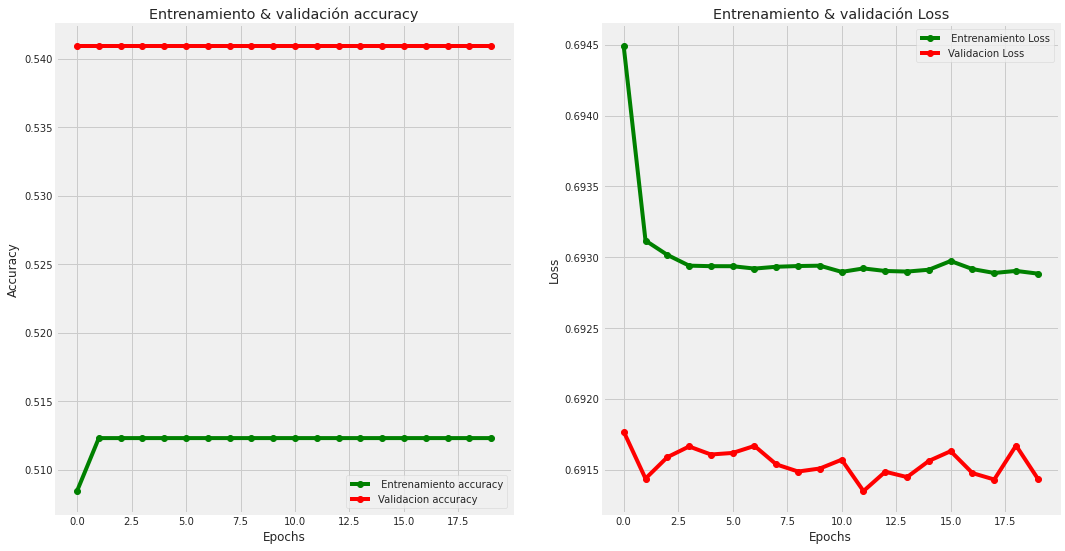

In [30]:
visualizacion_resultados(history_optimizer)

### Predicciones del dataser **test.csv**

In [31]:
test.head()

,test_index,Date,Open,High,Low,Close,Adj Close,Volume
0,6557,2019-06-05,9136.799805,9173.400391,9095.000000,9150.500000,9150.500000,158753000.0
1,6558,2019-06-06,9169.200195,9246.200195,9136.700195,9169.200195,9169.200195,212720900.0
2,6559,2019-06-07,9186.700195,9261.400391,9185.700195,9236.099609,9236.099609,150664700.0
3,6560,2019-06-10,9284.200195,9302.200195,9248.099609,9294.099609,9294.099609,102323700.0
4,6561,2019-06-11,9288.599609,9332.500000,9273.400391,9282.099609,9282.099609,144701200.0


In [ ]:
# Hacemos la prediccion

input_test = test.Close.values.reshape(-1,1)
input_test = escaler.fit_transform(input_test)
predictions_test = model_optimizer.predict(input_test, batch_size=64)
predictions_test

In [ ]:
predictions_test.reshape(-1,1)

In [74]:
predictions_test = pd.Series(predictions_test.reshape(-1,), name='Target')

In [76]:
predictions_test = predictions_test.apply(lambda x: 1 if x >= 0.5 else 0)

In [ ]:
predictions_test

In [79]:
prediction = pd.concat([test['test_index'],predictions_test],axis=1)

In [80]:
prediction

,test_index,Target
0,6557,1
1,6558,1
2,6559,1
3,6560,1
4,6561,1
...,...,...
721,7278,1
722,7279,1
723,7280,1
724,7281,1


In [84]:
prediction.to_csv('predictions.csv')

In [85]:
prediction.to_json('predictions.json')